In [1]:
import pandas as pd
import os

In [2]:
os.chdir('C:/Users/POZOLE/Documents/pp/nohtyp/practice_algo_trading/modelos_dummys_ver2.0/data_modelos_dummys2.0')
data = pd.read_csv('modelo_supervisado_2.0.csv')

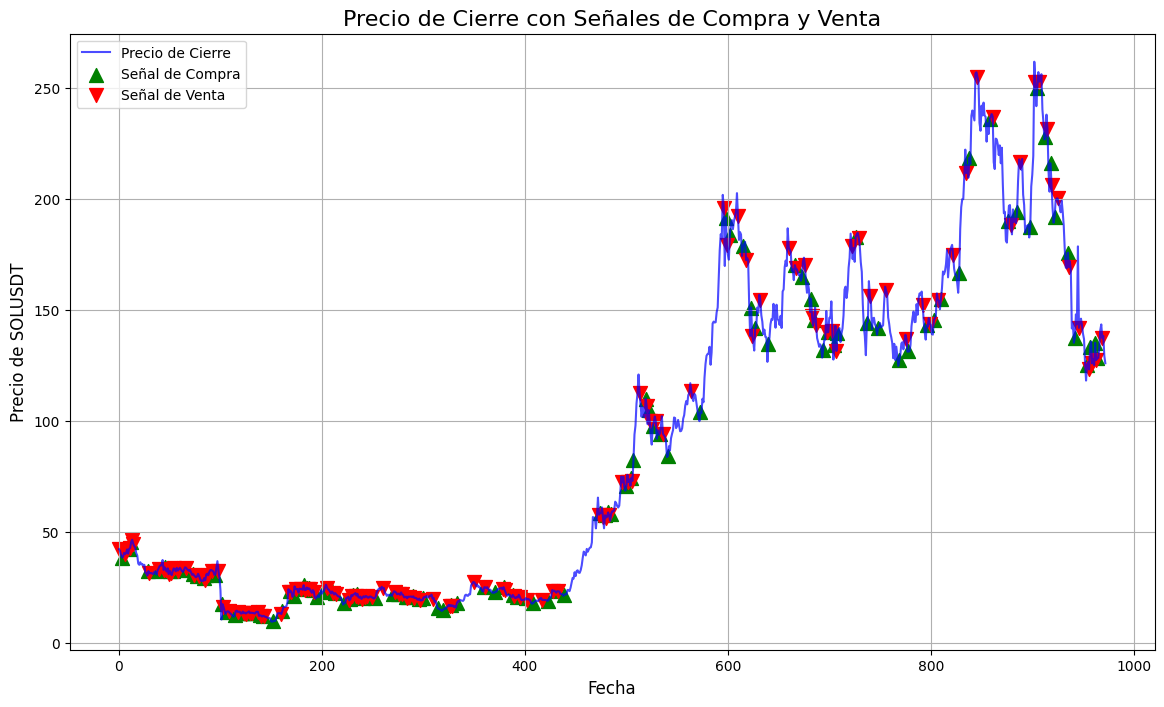

In [4]:
import matplotlib.pyplot as plt

# Crear gráfico de precios
plt.figure(figsize=(14, 8))
plt.plot(data['close'], label='Precio de Cierre', color='blue', alpha=0.7)

# Añadir señales de compra y venta
plt.scatter(data.index[data['buy_signal'] == 1], data['close'][data['buy_signal'] == 1], 
            marker='^', color='green', label='Señal de Compra', alpha=1, s=100)
plt.scatter(data.index[data['sell_signal'] == 1], data['close'][data['sell_signal'] == 1], 
            marker='v', color='red', label='Señal de Venta', alpha=1, s=100)

# Personalización del gráfico
plt.title('Precio de Cierre con Señales de Compra y Venta', fontsize=16)
plt.xlabel('Fecha', fontsize=12)
plt.ylabel(f'Precio de {'SOLUSDT'}', fontsize=12)
plt.legend(loc='best')
plt.grid(True)

# Mostrar gráfico
plt.show()

In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from autogluon.tabular import TabularPredictor
from sklearn.metrics import classification_report, accuracy_score

# Cargar los datos
df = data.copy()

# Verificar si hay valores NaN en la columna 'signals'
print(f"Valores NaN en 'signals': {df['signals'].isnull().sum()}")

# No usamos np.isinf porque 'signals' es texto

# Limpiar los valores NaN en la columna 'signals'
df = df.dropna(subset=['signals'])  # Eliminar filas con NaN en 'signals'

# Filtrar solo los valores válidos (por ejemplo, 'buy', 'sell', 'hold')
valid_signals = ['buy', 'sell', 'hold']
df = df[df['signals'].isin(valid_signals)]  # Mantener solo las filas con señales válidas

# Definir las columnas predictoras y la variable objetivo
features = ['open', 'value', 'rsi', 'macd', 'adx', 'adp', 'adm', 'dri',
            'dlogri', 'avgtr', 'donch_hband', 'donch_lband', 'vwap']
target = 'signals'

# Separar variables predictoras y objetivo
X = df[features]
y = df[target]

# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Normalizar las características
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convertir los datos a DataFrame para que AutoGluon los procese
train_data = pd.DataFrame(X_train, columns=features)
train_data['signals'] = y_train.reset_index(drop=True)

test_data = pd.DataFrame(X_test, columns=features)
test_data['signals'] = y_test.reset_index(drop=True)

# Entrenar el modelo AutoGluon
predictor = TabularPredictor(label='signals').fit(train_data)

# Realizar predicciones
y_pred = predictor.predict(test_data)

# Evaluar el modelo
accuracy = accuracy_score(test_data['signals'], y_pred)
print(f"Accuracy: {accuracy:.4f}")
print(classification_report(test_data['signals'], y_pred))


No path specified. Models will be saved in: "AutogluonModels\ag-20250401_015508"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.12.6
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.19045
CPU Count:          12
Memory Avail:       28.80 GB / 39.39 GB (73.1%)
Disk Space Avail:   330.24 GB / 447.08 GB (73.9%)
No presets specified! To achieve strong results with AutoGluon, it is recommended to use the available presets. Defaulting to `'medium'`...
	Recommended Presets (For more details refer to https://auto.gluon.ai/stable/tutorials/tabular/tabular-essentials.html#presets):
	presets='experimental' : New in v1.2: Pre-trained foundation model + parallel fits. The absolute best accuracy without consideration for inference speed. Does not support GPU.
	presets='best'         : Maximize accuracy. Recommended for most users. Use in competitions and benchmarks.
	presets='high'        

Valores NaN en 'signals': 0


	0.7445	 = Validation score   (accuracy)
	2.54s	 = Training   runtime
	0.02s	 = Validation runtime
Fitting model: KNeighborsDist ...
	0.7518	 = Validation score   (accuracy)
	0.0s	 = Training   runtime
	0.02s	 = Validation runtime
Fitting model: NeuralNetFastAI ...
	0.7956	 = Validation score   (accuracy)
	1.62s	 = Training   runtime
	0.01s	 = Validation runtime
Fitting model: LightGBMXT ...
	0.8175	 = Validation score   (accuracy)
	0.98s	 = Training   runtime
	0.0s	 = Validation runtime
Fitting model: LightGBM ...
	0.7956	 = Validation score   (accuracy)
	0.66s	 = Training   runtime
	0.0s	 = Validation runtime
Fitting model: RandomForestGini ...
	0.7883	 = Validation score   (accuracy)
	0.87s	 = Training   runtime
	0.04s	 = Validation runtime
Fitting model: RandomForestEntr ...
	0.781	 = Validation score   (accuracy)
	0.58s	 = Training   runtime
	0.04s	 = Validation runtime
Fitting model: CatBoost ...
	0.8102	 = Validation score   (accuracy)
	2.39s	 = Training   runtime
	0.0s	 = Valid

Accuracy: 0.7226
              precision    recall  f1-score   support

         buy       0.45      0.41      0.43        37
        hold       0.79      0.85      0.82       218
        sell       0.40      0.27      0.32        37

    accuracy                           0.72       292
   macro avg       0.55      0.51      0.52       292
weighted avg       0.70      0.72      0.71       292



In [11]:
# Normalizar todo el conjunto de datos
X_scaled = scaler.transform(X)

# Convertir el array normalizado a DataFrame con los nombres de columnas originales
df_scaled = pd.DataFrame(X_scaled, columns=features)

# Hacer predicciones para todo el conjunto de datos
df['predictions'] = predictor.predict(df_scaled)

# Comparar las predicciones con la variable objetivo real
df[['signals', 'predictions']].head(20)



,signals,predictions
0,sell,sell
1,hold,hold
2,hold,sell
3,buy,hold
4,hold,hold
5,hold,hold
6,sell,hold
7,hold,hold
8,hold,hold
9,hold,sell


In [14]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
import numpy as np

# Suponiendo que 'train_data' es el DataFrame utilizado para entrenar AutoGluon, con la columna 'signals'
kf = KFold(n_splits=5, shuffle=True, random_state=42)
scores = []

for train_index, val_index in kf.split(train_data):
    train_fold = train_data.iloc[train_index]
    val_fold = train_data.iloc[val_index]
    
    # Entrenar un nuevo predictor para el pliegue actual
    predictor_fold = TabularPredictor(label='signals', verbosity=0).fit(train_fold)
    
    # Realizar predicciones en el conjunto de validación del pliegue actual
    preds = predictor_fold.predict(val_fold)
    
    # Calcular la precisión del pliegue actual
    acc = accuracy_score(val_fold['signals'], preds)
    scores.append(acc)

print(f"Accuracy media de validación cruzada: {np.mean(scores):.4f}")


Accuracy media de validación cruzada: 0.7459


In [15]:
from sklearn.metrics import confusion_matrix

# Matriz de confusión
cm = confusion_matrix(df['signals'], df['predictions'])
print(cm)


[[ 72  50   0]
 [ 46 643  39]
 [  2  77  44]]


In [16]:
df['correcto'] = df['signals'] == df['predictions']
df[['signals', 'predictions', 'correcto']].head(20)


,signals,predictions,correcto
0,sell,sell,True
1,hold,hold,True
2,hold,sell,False
3,buy,hold,False
4,hold,hold,True
5,hold,hold,True
6,sell,hold,False
7,hold,hold,True
8,hold,hold,True
9,hold,sell,False


In [17]:
import numpy as np

# Si 'predicted_signals' está en df, haz lo siguiente:
df['buy_signal_pred'] = np.where(df['predictions'] == 'buy', 1, 0)
df['sell_signal_pred'] = np.where(df['predictions'] == 'sell', 1, 0)

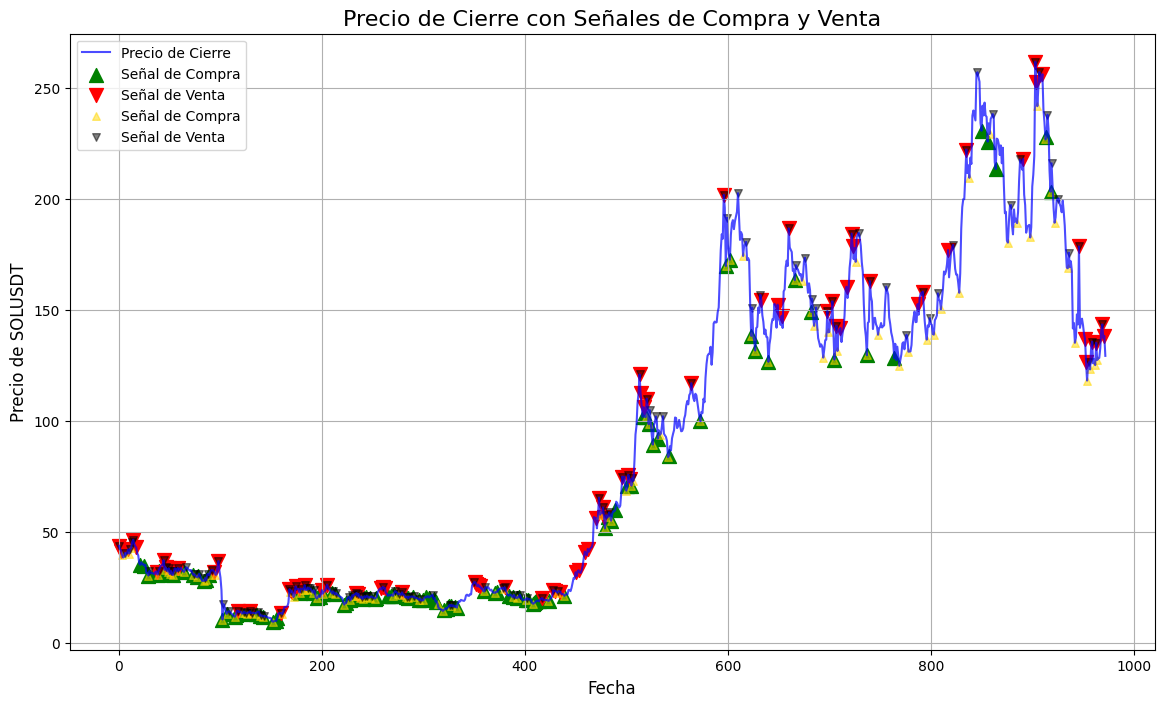

In [18]:
import matplotlib.pyplot as plt

# Crear gráfico de precios
plt.figure(figsize=(14, 8))
plt.plot(df['open'], label='Precio de Cierre', color='blue', alpha=0.7)

# Añadir señales de compra y venta
plt.scatter(df.index[df['buy_signal_pred'] == 1], df['open'][df['buy_signal_pred'] == 1], 
            marker='^', color='green', label='Señal de Compra', alpha=1, s=100)
plt.scatter(df.index[df['sell_signal_pred'] == 1], df['open'][df['sell_signal_pred'] == 1], 
            marker='v', color='red', label='Señal de Venta', alpha=1, s=100)
plt.scatter(df.index[df['buy_signal'] == 1], df['open'][df['buy_signal'] == 1], 
            marker='^', color='gold', label='Señal de Compra', alpha=0.5, s=30)
plt.scatter(df.index[df['sell_signal'] == 1], df['open'][df['sell_signal'] == 1], 
            marker='v', color='black', label='Señal de Venta', alpha=0.5, s=30)

# Personalización del gráfico
plt.title('Precio de Cierre con Señales de Compra y Venta', fontsize=16)
plt.xlabel('Fecha', fontsize=12)
plt.ylabel(f'Precio de {'SOLUSDT'}', fontsize=12)
plt.legend(loc='best')
plt.grid(True)

# Mostrar gráfico
plt.show()

Compra a 35.265 en 21/08/2022
Venta a 32.145 en 06/09/2022 | ROI: -8.85%
Compra a 30.865 en 07/09/2022
Venta a 37.415 en 13/09/2022 | ROI: 21.22%
Compra a 32.96 en 14/09/2022
Venta a 34.11 en 15/09/2022 | ROI: 3.49%
Compra a 32.235 en 17/09/2022
Venta a 33.67 en 18/09/2022 | ROI: 4.45%
Compra a 31.07 en 19/09/2022
Venta a 32.605 en 20/09/2022 | ROI: 4.94%
Compra a 30.625 en 22/09/2022
Venta a 33.86 en 27/09/2022 | ROI: 10.56%
Compra a 32.055 en 03/10/2022
Venta a 32.195 en 02/11/2022 | ROI: 0.44%
Compra a 10.61 en 10/11/2022
Venta a 14.595 en 25/11/2022 | ROI: 37.56%
Compra a 13.345 en 30/11/2022
Venta a 14.29 en 07/12/2022 | ROI: 7.08%
Compra a 13.31 en 13/12/2022
Venta a 13.485 en 07/01/2023 | ROI: 1.31%
Compra a 22.775 en 25/01/2023
Venta a 26.08 en 30/01/2023 | ROI: 14.51%
Compra a 23.905 en 01/02/2023
Venta a 23.865 en 16/02/2023 | ROI: -0.17%
Compra a 22.255 en 17/02/2023
Venta a 26.295 en 21/02/2023 | ROI: 18.15%
Compra a 22.358 en 26/02/2023
Venta a 22.534 en 22/03/2023 | ROI: 

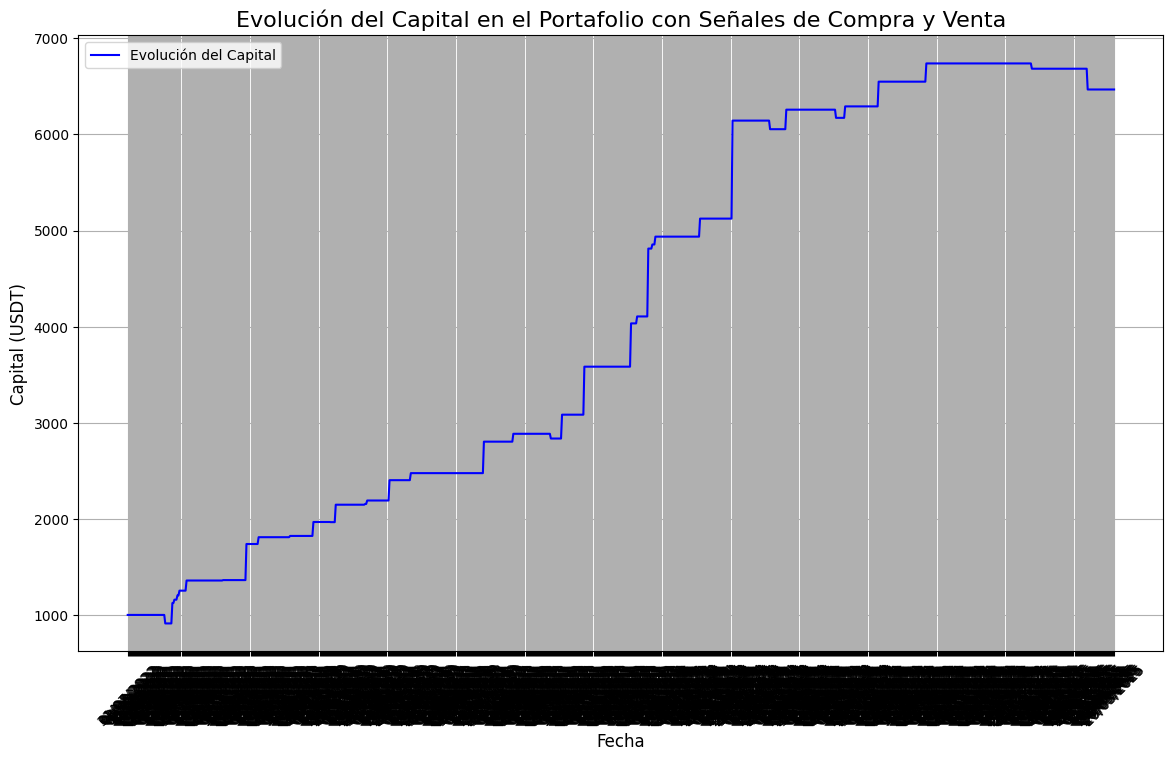

In [19]:
import pandas as pd

# Crear una copia del DataFrame
df_validation = df.copy()

# Inicializar las variables
capital_inicial = 1000  # Ejemplo de inversión inicial en USDT
capital = capital_inicial  # Capital actualizado durante las operaciones
buy_price = 0  # Precio al que se compró el activo
holding = False  # Estado de si se tiene una posición abierta

# Listas para almacenar resultados
capital_history = []  # Historial del capital a lo largo del tiempo
buy_prices = []  # Historial de precios de compra
sell_prices = []  # Historial de precios de venta

# Iterar a través de las filas del DataFrame
for index, row in df_validation.iterrows():
    # Señal de compra
    if row['buy_signal_pred'] == 1 and not holding:
        buy_price = row['open']
        holding = True  # Se abre la posición
        buy_prices.append(buy_price)
        print(f"Compra a {buy_price} en {df_validation['date'][index]}")
    
    # Señal de venta
    elif row['sell_signal_pred'] == 1 and holding:
        sell_price = row['open']
        roi = (sell_price - buy_price) / buy_price  # Cálculo del ROI
        capital += capital_inicial * roi  # Actualización del capital
        sell_prices.append(sell_price)
        holding = False  # Se cierra la posición
        print(f"Venta a {sell_price} en {df_validation['date'][index]} | ROI: {roi*100:.2f}%")
    
    capital_history.append(capital)  # Guardar capital actual

# Imprimir el capital final
print(f"Capital final: {capital:.2f} USDT")

# Opcional: Crear un DataFrame para visualizar el historial de capital
df_validation_capital = pd.DataFrame({
    'Date': df_validation['date'],
    'Capital': capital_history
})

# Graficar la evolución del capital a lo largo del tiempo
plt.figure(figsize=(14, 8))
plt.plot(df_validation_capital['Date'], df_validation_capital['Capital'], label='Evolución del Capital', color='blue')
plt.title('Evolución del Capital en el Portafolio con Señales de Compra y Venta', fontsize=16)
plt.xlabel('Fecha', fontsize=12)
plt.ylabel('Capital (USDT)', fontsize=12)
plt.grid(True)
plt.legend(loc='best')
plt.xticks(rotation=45)
plt.show()


Capital Final: 974.49 USDT
Tasa de Retorno Acumulado: -2.55%
Volatilidad Anualizada: 0.8915
Relación de Sharpe: -0.0082
Drawdown Máximo: -90.56%


C:\Users\POZOLE\AppData\Local\Temp\ipykernel_4144\161241951.py:10: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['date'] = pd.to_datetime(df['date'])


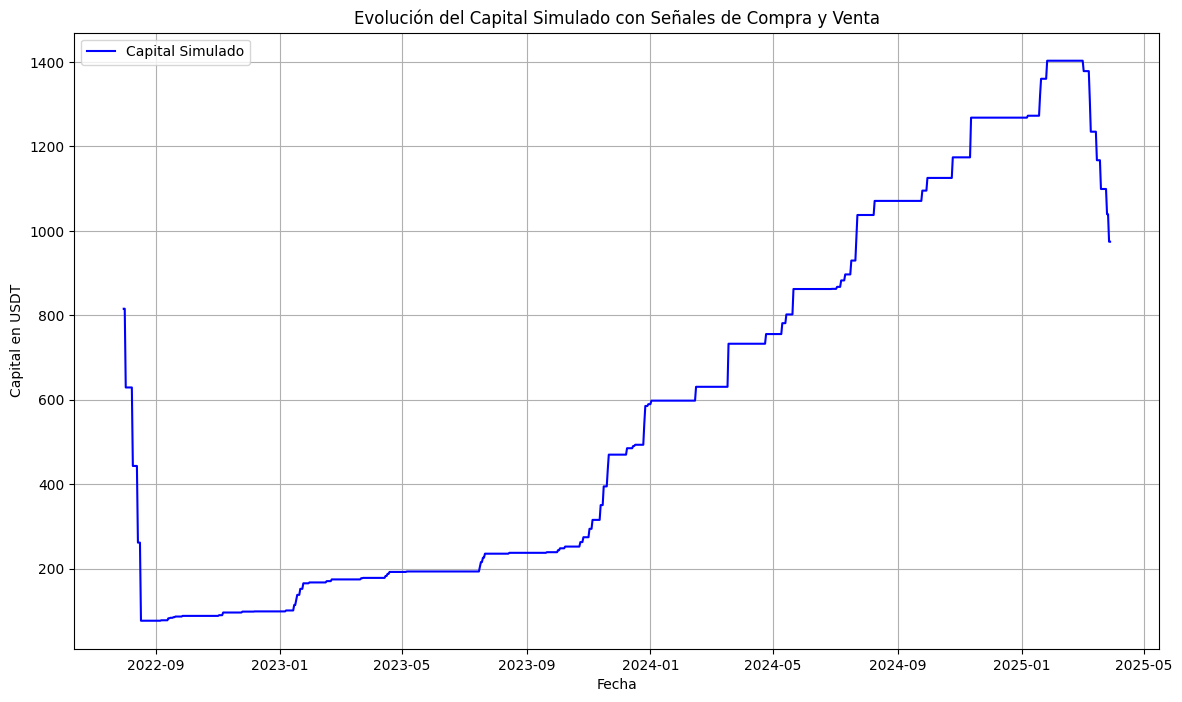

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

# Supongamos que tienes los datos necesarios con las señales predichas
# Aquí se toma el dataframe 'df' con las señales de compra y venta predichas

# Asegúrate de que las fechas estén en el formato correcto
df['date'] = pd.to_datetime(df['date'])
df.sort_values('date', inplace=True)

# Calcula el retorno diario en base al precio 'open'
df['daily_return'] = df['open'].pct_change()

# Calcula el retorno acumulado de la inversión
initial_capital = 1000  # Capital inicial
df['capital'] = initial_capital * (1 + df['daily_return']).cumprod()

# Añadir señales de compra y venta al DataFrame
df['buy_signal'] = df['buy_signal_pred'] == 1
df['sell_signal'] = df['sell_signal_pred'] == 1

# Simular las compras y ventas
capital = initial_capital
capital_series = []

for i in range(len(df)):
    if df['buy_signal'].iloc[i]:
        buy_price = df['open'].iloc[i]
    if df['sell_signal'].iloc[i]:
        sell_price = df['open'].iloc[i]
        capital += (sell_price - buy_price)  # Calcular el retorno de la venta
    capital_series.append(capital)

df['capital_simulado'] = capital_series

# 1. Calcular el Drawdown
df['capital_max'] = df['capital_simulado'].cummax()
df['drawdown'] = df['capital_simulado'] - df['capital_max']
df['drawdown_pct'] = df['drawdown'] / df['capital_max'] * 100

# 2. Calcular la volatilidad (desviación estándar de los retornos diarios)
volatilidad = df['daily_return'].std() * np.sqrt(252)  # Volatilidad anualizada

# 3. Calcular la rentabilidad diaria promedio
rentabilidad_diaria = df['daily_return'].mean()

# 4. Calcular la relación de Sharpe
tasa_libre_riesgo = 0.01  # Asumimos una tasa libre de riesgo del 1%
sharpe_ratio = (rentabilidad_diaria - tasa_libre_riesgo) / volatilidad

# 5. Resultado Final
capital_final = df['capital_simulado'].iloc[-1]
tasa_retorno_acumulado = (capital_final - initial_capital) / initial_capital * 100

# Imprimir métricas de desempeño
print(f"Capital Final: {capital_final:.2f} USDT")
print(f"Tasa de Retorno Acumulado: {tasa_retorno_acumulado:.2f}%")
print(f"Volatilidad Anualizada: {volatilidad:.4f}")
print(f"Relación de Sharpe: {sharpe_ratio:.4f}")
print(f"Drawdown Máximo: {df['drawdown_pct'].min():.2f}%")

# Graficar la evolución del capital simulado
plt.figure(figsize=(14, 8))
plt.plot(df['date'], df['capital_simulado'], label='Capital Simulado', color='blue')
plt.title('Evolución del Capital Simulado con Señales de Compra y Venta')
plt.xlabel('Fecha')
plt.ylabel('Capital en USDT')
plt.grid(True)
plt.legend()
plt.show()


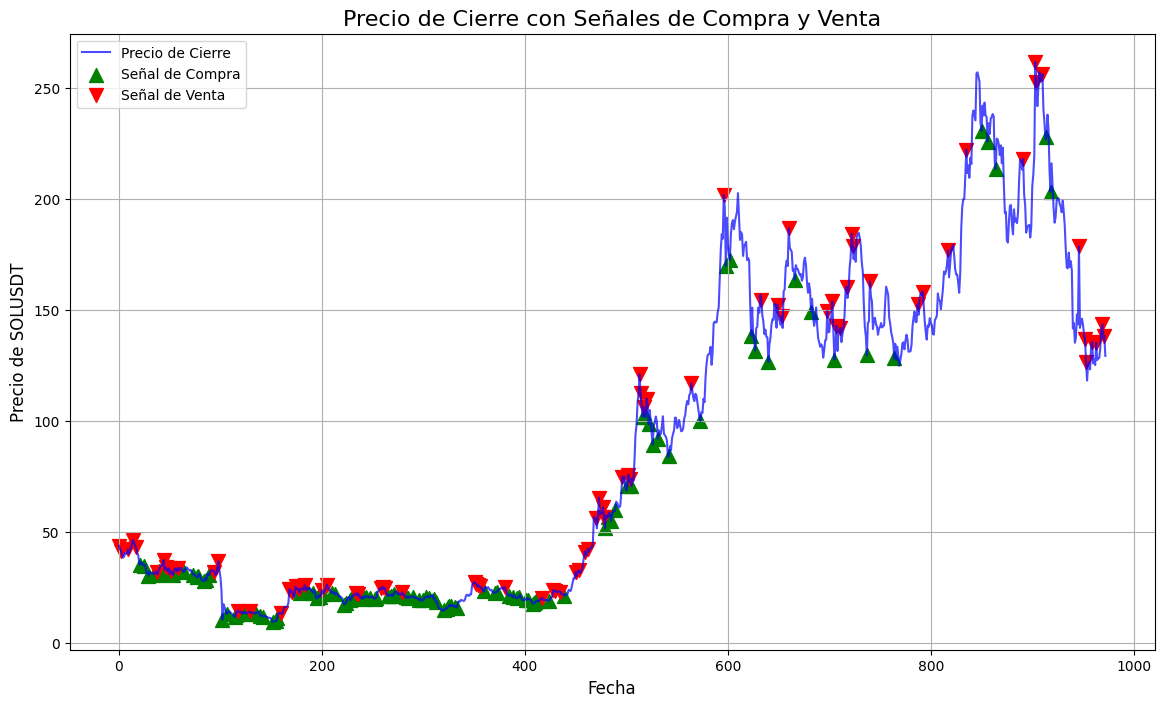

In [21]:
import matplotlib.pyplot as plt

# Crear gráfico de precios
plt.figure(figsize=(14, 8))
plt.plot(df['open'], label='Precio de Cierre', color='blue', alpha=0.7)

# Añadir señales de compra y venta
plt.scatter(df.index[df['buy_signal_pred'] == 1], df['open'][df['buy_signal_pred'] == 1], 
            marker='^', color='green', label='Señal de Compra', alpha=1, s=100)
plt.scatter(df.index[df['sell_signal_pred'] == 1], df['open'][df['sell_signal_pred'] == 1], 
            marker='v', color='red', label='Señal de Venta', alpha=1, s=100)


# Personalización del gráfico
plt.title('Precio de Cierre con Señales de Compra y Venta', fontsize=16)
plt.xlabel('Fecha', fontsize=12)
plt.ylabel(f'Precio de {'SOLUSDT'}', fontsize=12)
plt.legend(loc='best')
plt.grid(True)

# Mostrar gráfico
plt.show()